<a href="https://colab.research.google.com/github/jacksonns/IMBD-Data-Visualization/blob/main/imbd_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processando Conjuntos de Dados do IMDB

## Baixando Conjuntos de Dados

In [ ]:
import urllib
import gzip
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [ ]:
def download_and_extract(file_name):
  base_url = 'https://datasets.imdbws.com/'
  url = base_url + file_name + '.gz'
  with urllib.request.urlopen(url) as response:
    # Decompress file
    with gzip.GzipFile(fileobj=response) as uncompressed:
      file_content = uncompressed.read()
    # write to file in binary mode 'wb'
    with open(file_name, 'wb') as f:
      f.write(file_content)

In [ ]:
datasets = ['name.basics.tsv', 'title.basics.tsv', 'title.principals.tsv', 'title.ratings.tsv']

for file in datasets:
  download_and_extract(file)



## Explorando 'Title Basics'

Tabela com 9.861.052 linhas, contendo diferentes tipos de obras ('short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot')

In [ ]:
titles = pd.read_csv('title.basics.tsv', sep='\t')
titles.head()

<ipython-input-4-2edac2f4f7dc>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles = pd.read_csv('title.basics.tsv', sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
len(titles.index)

9930711

In [ ]:
# Tipos de obras no dataset.
title_types = titles['titleType'].unique()
title_types

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

É possível perceber que a maioria das obras estão na categoria tvEpisode. Podemos ignorá-las a princípio para reduzir o tamanho dos dados




Text(0.5, 1.0, 'Tipos de obras')

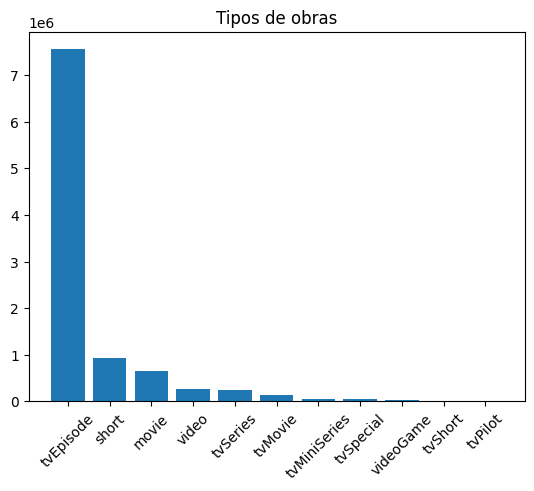

In [ ]:
count_titles = titles['titleType'].value_counts().sort_values(ascending=False)
plt.bar(count_titles.index, count_titles.values)
plt.xticks(rotation=45)
plt.title('Tipos de obras')

Considerando apenas a categoria filme ('movie'). São 645.594 obras nessa categoria

In [ ]:
movies = titles.query(" titleType == 'movie' ")
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama


In [ ]:
len(movies.index)

648205

Visualizando curva de quantidade de filmes por ano

In [ ]:
nan_index = movies[movies['startYear'] == '\\N'].index
movies_with_year = movies.drop(nan_index)
year_counts = movies_with_year['startYear'].value_counts().sort_index()
year_counts

1894     1
1896     1
1897     2
1898     7
1899     8
        ..
2027    11
2028     1
2029     4
2030     1
2031     1
Name: startYear, Length: 137, dtype: int64

Text(0.5, 1.0, 'Quantidade de filmes por ano')

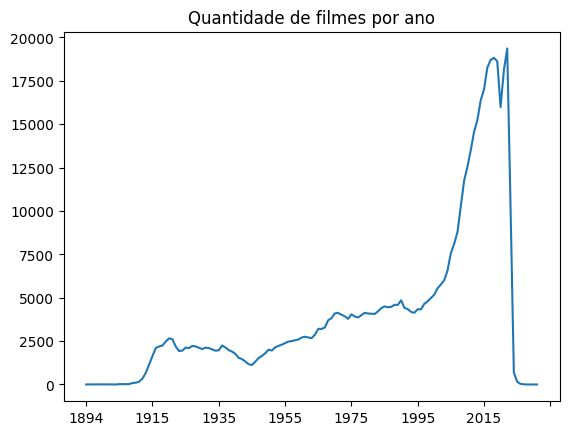

In [ ]:
year_counts.plot()
plt.title('Quantidade de filmes por ano')

Visualizando distribuição de gêneros dos filmes

In [ ]:
# Considerando apenas filmes que possuem pelo o menos um gênero associado
nan_genres = movies[movies['genres'] == '\\N'].index
movies_with_genres = movies.drop(nan_genres)
len(movies_with_genres)

575898

In [ ]:
# Obtendo todos os gêneros únicos considerados
movies_genres_column = movies_with_genres['genres'].str.split(',')
unique_genres = np.unique(np.concatenate(movies_genres_column.values))
unique_genres

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'], dtype='<U11')

In [ ]:
# Contando número de filmes de cada gênero (1 filme pode ter mais de um gênero)
genres_expanded = movies_genres_column.explode().value_counts()
genres_expanded

Drama          235018
Documentary    123066
Comedy         109441
Action          54056
Romance         47426
Thriller        44895
Crime           37362
Horror          37183
Adventure       28174
Family          17707
Biography       17323
Mystery         17105
Fantasy         15406
History         14327
Sci-Fi          13974
Music           13699
Musical         10249
War              9293
Adult            9243
Animation        9127
Western          8176
Sport            7161
News             1445
Film-Noir         881
Reality-TV        517
Talk-Show         175
Game-Show          25
Short               1
Name: genres, dtype: int64

Text(0.5, 1.0, 'Distribuição de gêneros dos filmes')

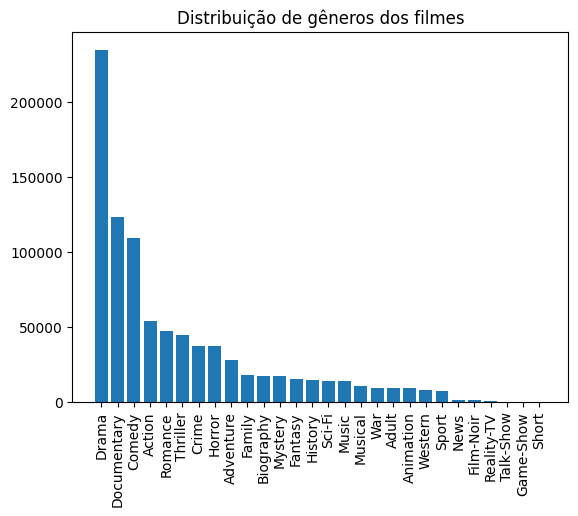

In [ ]:
plt.bar(genres_expanded.index, genres_expanded.values)
plt.xticks(rotation=90)
plt.title('Distribuição de gêneros dos filmes')

## Explorando elenco dos filmes

In [ ]:
movies = pd.read_csv('title.basics.tsv', sep='\t')
movies = movies.query(" titleType == 'movie' ")
movies = movies[['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres']]
movies.head()

<ipython-input-4-f5c6bbc4c4ac>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('title.basics.tsv', sep='\t')


,tconst,primaryTitle,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
498,tt0000502,Bohemios,1905,100,\N
570,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,1907,90,Drama


In [ ]:
movies.replace('\\N', np.nan, inplace=True)
movies.dropna(inplace=True)
movies['startYear'] = movies['startYear'].astype(int)

In [ ]:
ratings = pd.read_csv('title.ratings.tsv', sep='\t')
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1982
1,tt0000002,5.8,265
2,tt0000003,6.5,1836
3,tt0000004,5.6,179
4,tt0000005,6.2,2625


In [ ]:
movies = pd.merge(movies, ratings, on='tconst')
movies.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,206
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",5.3,475
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,830
3,tt0000591,The Prodigal Son,1907,90,Drama,4.4,20
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.1,68


In [ ]:
movies.shape

(258602, 7)

In [ ]:
movies[(movies['numVotes'] > 1000)]

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
20,tt0002130,Dante's Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,3160
41,tt0002844,Fantômas: In the Shadow of the Guillotine,1913,54,"Crime,Drama",6.9,2391
49,tt0003014,Ingeborg Holm,1913,96,Drama,7.0,1322
52,tt0003037,Fantomas: The Man in Black,1913,61,"Crime,Drama",6.9,1624
56,tt0003165,Fantômas: The Dead Man Who Killed,1913,90,"Crime,Drama,Mystery",6.9,1286
...,...,...,...,...,...,...,...
258563,tt9907782,The Cursed,2021,111,"Fantasy,Horror,Mystery",6.2,13417
258564,tt9908390,Le lion,2020,95,Comedy,5.4,1300
258577,tt9911196,The Marriage Escape,2020,103,"Comedy,Drama",7.5,3034
258599,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1423


In [ ]:
movies = movies[(movies['numVotes'] > 1000)]

In [ ]:
# Obtendo identificadores dos filmes
movies_ids = movies['tconst'].values
movies_ids

array(['tt0002130', 'tt0002844', 'tt0003014', ..., 'tt9911196',
       'tt9916270', 'tt9916362'], dtype=object)

In [ ]:
# Arquivo 'title.principals' é muito grande para ser carregado na memória principal,
# portanto, é processado em blocos

chunks = []

for chunk in pd.read_csv('title.principals.tsv', sep='\t', chunksize=1000000):
  # Filtra apenas 'principals' dos filmes
  movies_principals = chunk[chunk['tconst'].isin(movies_ids)]
  # Seleciona apenas atores e atrizes (ignorando diretores, compositores, etc)
  movies_principals = movies_principals.query(" category == 'actor' | category == 'actress' ")
  # Seleciona apenas as colunas úteis
  movies_principals = movies_principals[['tconst', 'nconst']]
  chunks.append(movies_principals)

actors = pd.concat(chunks)

actors.head()

,tconst,nconst
9956,tt0002130,nm0660139
9957,tt0002130,nm0685283
9958,tt0002130,nm0209738
9959,tt0002130,nm3942815
14582,tt0002844,nm0622772


In [ ]:
names_ids = actors['nconst'].values
names_ids

array(['nm0660139', 'nm0685283', 'nm0209738', ..., 'nm0107165',
       'nm0266723', 'nm10678594'], dtype=object)

In [ ]:
# Obtendo nomes dos atores e atrizes
names = pd.read_csv('name.basics.tsv', sep='\t')
names = names[['nconst', 'primaryName']]
names = names[names['nconst'].isin(names_ids)]
names.head()

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
5,nm0000006,Ingrid Bergman


In [ ]:
# Fazendo merge dos dataframes para obter uma tabela única.
# Cada filme possui muitas linhas correspondentes, cuja única diferença
# é a coluna 'primaryName', referente ao nome do ator

actors = actors.merge(movies, on='tconst').merge(names, on='nconst')
actors.head()

,tconst,nconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,primaryName
0,tt0002130,nm0660139,Dante's Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,3160,Salvatore Papa
1,tt0002130,nm0685283,Dante's Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,3160,Arturo Pirovano
2,tt0002130,nm0209738,Dante's Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,3160,Giuseppe de Liguoro
3,tt0002130,nm3942815,Dante's Inferno,1911,71,"Adventure,Drama,Fantasy",7.0,3160,Pier Delle Vigne
4,tt0002844,nm0622772,Fantômas: In the Shadow of the Guillotine,1913,54,"Crime,Drama",6.9,2391,René Navarre


In [ ]:
# Agregando linhas referentes a um filme, criando uma lista de atores no campo 'primaryName'

agg_dict = {'primaryName': list,
            'primaryTitle': 'first',
            'startYear': 'first' ,
            'averageRating': 'first',
            'numVotes':'first',
            'genres': 'first'}
df_agrupado = actors.groupby('tconst').agg(agg_dict).reset_index()
df_agrupado.head()

,tconst,primaryName,primaryTitle,startYear,averageRating,numVotes,genres
0,tt0002130,"[Salvatore Papa, Arturo Pirovano, Giuseppe de ...",Dante's Inferno,1911,7.0,3160,"Adventure,Drama,Fantasy"
1,tt0002844,"[René Navarre, Edmund Breon, Georges Melchior,...",Fantômas: In the Shadow of the Guillotine,1913,6.9,2391,"Crime,Drama"
2,tt0003014,"[Richard Lund, Hilda Borgström, Georg Grönroos...",Ingeborg Holm,1913,7.0,1322,Drama
3,tt0003037,"[René Navarre, Edmund Breon, Georges Melchior,...",Fantomas: The Man in Black,1913,6.9,1624,"Crime,Drama"
4,tt0003165,"[René Navarre, Edmund Breon, Georges Melchior,...",Fantômas: The Dead Man Who Killed,1913,6.9,1286,"Crime,Drama,Mystery"


In [ ]:
# Renomeando colunas (lista de atores = 'actors', título do filme = 'title', ano = 'year')

rename_dict = {'primaryName':'actors', 'primaryTitle':'title', 'startYear':'year'}
df_agrupado.rename(columns = rename_dict, inplace = True)
df_agrupado.head()

,tconst,actors,title,year,averageRating,numVotes,genres
0,tt0002130,"[Salvatore Papa, Arturo Pirovano, Giuseppe de ...",Dante's Inferno,1911,7.0,3160,"Adventure,Drama,Fantasy"
1,tt0002844,"[René Navarre, Edmund Breon, Georges Melchior,...",Fantômas: In the Shadow of the Guillotine,1913,6.9,2391,"Crime,Drama"
2,tt0003014,"[Richard Lund, Hilda Borgström, Georg Grönroos...",Ingeborg Holm,1913,7.0,1322,Drama
3,tt0003037,"[René Navarre, Edmund Breon, Georges Melchior,...",Fantomas: The Man in Black,1913,6.9,1624,"Crime,Drama"
4,tt0003165,"[René Navarre, Edmund Breon, Georges Melchior,...",Fantômas: The Dead Man Who Killed,1913,6.9,1286,"Crime,Drama,Mystery"


In [ ]:
df_agrupado.shape

(38550, 7)

In [ ]:
#!pip install pymongo

In [ ]:
#from pymongo import MongoClient
#from pymongo.server_api import ServerApi

In [ ]:
''' URI = ...
client = MongoClient(URI, server_api=ServerApi('1'))
db = client['imdb']
collection = db['movies.data']

data_json = df_agrupado.to_dict(orient='records')
collection.insert_many(data_json) '''

" URI = ...\nclient = MongoClient(URI, server_api=ServerApi('1'))\ndb = client['imdb']\ncollection = db['movies.data']\n\ndata_json = df_agrupado.to_dict(orient='records')\ncollection.insert_many(data_json) "

## Ranking de filmes

In [ ]:
import plotly.express as px

In [ ]:
movies_df = df_agrupado.sort_values('averageRating', ascending=True)

In [ ]:
fig = px.bar(df_agrupado.sample(n=200), x='tconst', y='averageRating', color='year', color_continuous_scale='Reds')

fig.update_traces(hovertemplate='Filme: %{text}<br>Nota: %{y}<br>Ano: %{marker.color}', text=df_agrupado['title'])

fig.update_layout(
    xaxis_title=None,
    yaxis_title='Nota',
    title='Notas dos Filmes',
    coloraxis_colorbar=dict(title='Ano')
)

fig.update_xaxes(showticklabels=False)

fig.show()

## Construindo Grafo de Conexões

In [ ]:
import networkx as nx
import plotly.graph_objects as go

def network_graph(df):
  grafo = nx.Graph()

  # Add nodes
  for actors in df['actors']:
      grafo.add_nodes_from(actors)

  # Add actors
  for index, actors in enumerate(df['actors']):
      for i in range(len(actors)):
          for j in range(i + 1, len(actors)):
              grafo.add_edge(actors[i], actors[j], movie=df['title'][index])

  pos = nx.spring_layout(grafo)

  x = []
  y = []
  for actor, position in pos.items():
      x.append(position[0])
      y.append(position[1])

  # Create graph using plotly
  fig = go.Figure()


  # Add edges to graph
  for edge in grafo.edges:
      x0, y0 = pos[edge[0]]
      x1, y1 = pos[edge[1]]
      movie = grafo.edges[edge]['movie']

      fig.add_trace(go.Scatter(
          x=[x0, x1],
          y=[y0, y1],
          mode='lines',
          line=dict(width=1, color='gray'),
          showlegend=False
      ))

      fig.add_trace(go.Scatter(
        x=[(x0 + x1) / 2],
        y=[(y0 + y1) / 2],
        mode='markers',
        marker=dict(size=0.001, color='rgba(0, 0, 0, 0)'),
        hovertemplate=f'{edge[0]} - {edge[1]}<br>Filme: {movie}<extra></extra>'
    ))

  # Add nodes to graph
  fig.add_trace(go.Scatter(
      x=x,
      y=y,
      mode='markers',
      marker=dict(size=10, color='#00008B'),
      text=list(pos.keys()),
      hovertemplate='%{text}<extra></extra>'
  ))

  # Config layout
  fig.update_layout(
      showlegend=False,
      hovermode='closest',
      xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
      yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
      width=1200,
      height=600
  )

  fig.show()

In [ ]:
actor_df = df_agrupado[df_agrupado['actors'].apply(lambda actors: 'Angelina Jolie' in actors)].reset_index(drop=True)

In [ ]:
network_graph(actor_df)

In [ ]:
df_agrupado['genre'] = df_agrupado['genres'].str.split(',')
df_agrupado = df_agrupado.explode('genre')

df_agrupado['averageRating'] = pd.to_numeric(df_agrupado['averageRating'])
genre_avg_ratings = df_agrupado.groupby('genre')['averageRating'].mean()

top_genres = genre_avg_ratings.sort_values(ascending=False).head(10) # Selecting the top 10 genres
filtered_movies = df_agrupado[df_agrupado['genre'].isin(top_genres.index)]
genre_order = top_genres.index

fig = px.box(filtered_movies, x='genre', y='averageRating', labels={'averageRating': 'Average Rating'},
             category_orders={'genre': genre_order}, hover_data=['title'])


fig.update_traces(hovertemplate='Title: %{customdata[0]}<br>Average Rating: %{y}')

fig.update_layout(title='Genre vs. Rating')

fig.show()
